Citation: https://machinelearningmastery.com/what-is-bayesian-optimization/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# objective function
def objective(x, noise=0.1):
	noise = np.random.normal(loc=0, scale=noise)
	return (x**2 * np.math.sin(5 * np.math.pi * x)**6.0) + noise

# grid-based sample of the domain [0,1]
x = np.arange(0, 1, 0.01)

# sample the domain without noise
y_no_noise = np.array([objective(i, 0) for i in x])

y = np.array([objective(i) for i in x])

In [24]:
import torch
torch.randint(high = 10, size = [1]).numpy()

array([1], dtype=int64)

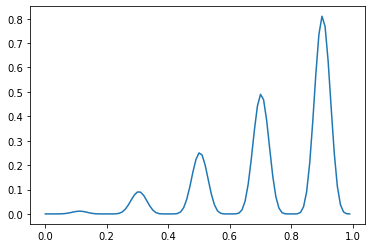

In [25]:
plt.plot(x,y_no_noise)

In [47]:
# define the model
from sklearn.gaussian_process import GaussianProcessRegressor
model = GaussianProcessRegressor()
model.fit(x.reshape(-1, 1),y.reshape(-1, 1))

from warnings import catch_warnings,simplefilter
def surrogate(model, X):
	# catch any warning generated when making a prediction
	with catch_warnings():
		# ignore generated warnings
		simplefilter("ignore")
	return model.predict(X, return_std=True)

def surrogate_2(new_x,x,y):
    with catch_warnings():    
        simplefilter("ignore")
    model = GaussianProcessRegressor()
    model.fit(x.reshape(-1, 1),y.reshape(-1, 1))   
    return model.predict(new_x, return_std=True)



In [27]:
np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

TypeError: Field elements must be 2- or 3-tuples, got '0'

In [48]:
def plot(X, y, model):
	# scatter plot of inputs and real objective function
	plt.scatter(X, y)
	# line plot of surrogate function across domain
	Xsamples = np.array(np.arange(0, 1, 0.001))
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	ysamples, _ = surrogate(model, Xsamples)
	plt.plot(Xsamples, ysamples)
	# show the plot
	plt.show()

In [49]:
def opt_acquisition(X, y, model):
	# random search, generate random samples
	Xsamples = np.random(100)
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	# calculate the acquisition function for each sample
	scores = acquisition(X, Xsamples, model)
	# locate the index of the largest scores
	ix = np.argmax(scores)
	return Xsamples[ix, 0]

In [58]:
from scipy.stats import norm
# probability of improvement acquisition function
def acquisition(X, Xsamples, model):
	# calculate the best surrogate score found so far
	yhat, _ = surrogate(model, X)
	best = max(yhat)
	# calculate mean and stdev via surrogate function
	mu, std = surrogate(model, Xsamples)
	mu = mu[:, 0]
	# calculate the probability of improvement
	probs = norm.cdf((mu - best) / (std+1E-9))
	return probs

CMAES